### Download Dataset


In [123]:
%%bash

if [[ ! -f "Clean_Dataset.csv" ]]; then
    curl -L -o dataset.zip\
    https://www.kaggle.com/api/v1/datasets/download/shubhambathwal/flight-price-prediction &&\
    unzip dataset.zip
    rm -f dataset.zip   business.csv economy.csv
fi


### Import required libraries


In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

sns.set_style("whitegrid")

In [125]:
df = pd.read_csv("./Clean_Dataset.csv")

### Data Exploration


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [127]:
df = df.drop(columns=["Unnamed: 0"])

In [128]:
df.head(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [129]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


#### Price according to class


In [130]:
df["class"].unique()

array(['Economy', 'Business'], dtype=object)

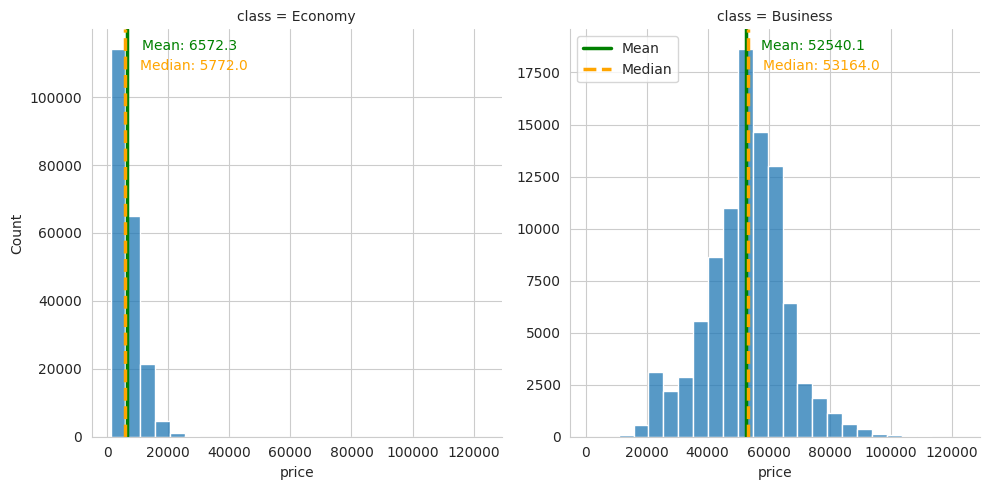

In [131]:
g = sns.displot(
    data=df,
    x="price",
    col="class",
    bins=25,
    facet_kws=dict(sharex=False, sharey=False),
)

axes = g.axes.flatten()

# iterate through each axes
for ax in axes:
    spec = ax.get_title().split(" = ")[1]

    data = df[df["class"] == spec]["price"]

    ax.axvline(x=data.mean(), c="g", ls="-", lw=2.5, label="Mean")
    ax.text(
        data.mean() + 5000,
        0.95,
        f"Mean: {round(data.mean(),1)}",
        color="green",
        transform=ax.get_xaxis_transform(),
    )
    ax.axvline(x=data.median(), c="orange", ls="--", lw=2.5, label="Median")
    ax.text(
        data.median() + 5000,
        0.90,
        f"Median: {round(data.median(),1)}",
        color="orange",
        transform=ax.get_xaxis_transform(),
    )
plt.legend()
plt.show()

#### Price comparision between different airlines

In [132]:
import matplotlib.ticker as plticker

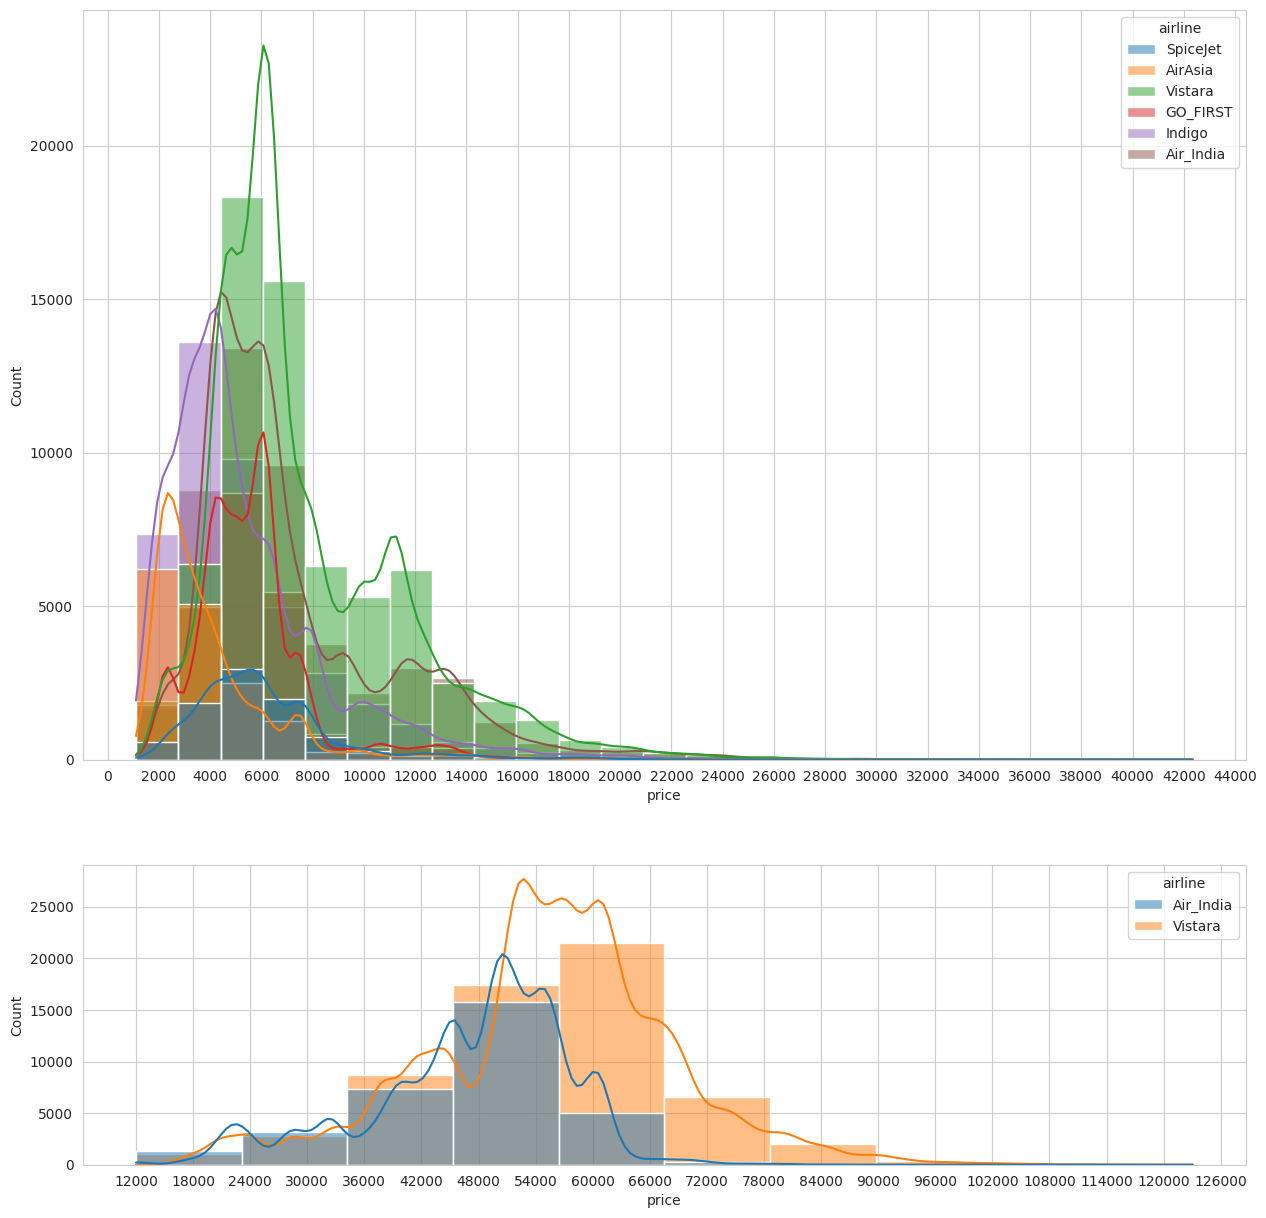

In [133]:
fig, axes = plt.subplots(
    2, 1, sharex=False, sharey=False, height_ratios=[5, 2], figsize=(15, 15)
)
sns.histplot(
    df[df["class"] == "Economy"],
    x="price",
    hue="airline",
    ax=axes[0],
    bins=25,
    kde=True,
)
sns.histplot(
    df[df["class"] == "Business"],
    x="price",
    hue="airline",
    ax=axes[1],
    bins=10,
    kde=True,
)
axes[0].xaxis.set_major_locator(plticker.MultipleLocator(2000))
axes[1].xaxis.set_major_locator(plticker.MultipleLocator(6000))

#### Price vs Number of days left

In [134]:
price_days_left_economy = (
    df[df["class"] == "Economy"]
    .groupby(["days_left", "airline"], as_index=False, sort=[True, True])["price"]
    .median()
)

In [135]:
price_days_left_business = (
    df[df["class"] == "Business"]
    .groupby(["days_left", "airline"], as_index=False, sort=[True, True])["price"]
    .median()
)

Text(6.5, 0.9, 'Prices jump 6 days \nbefore the flight')

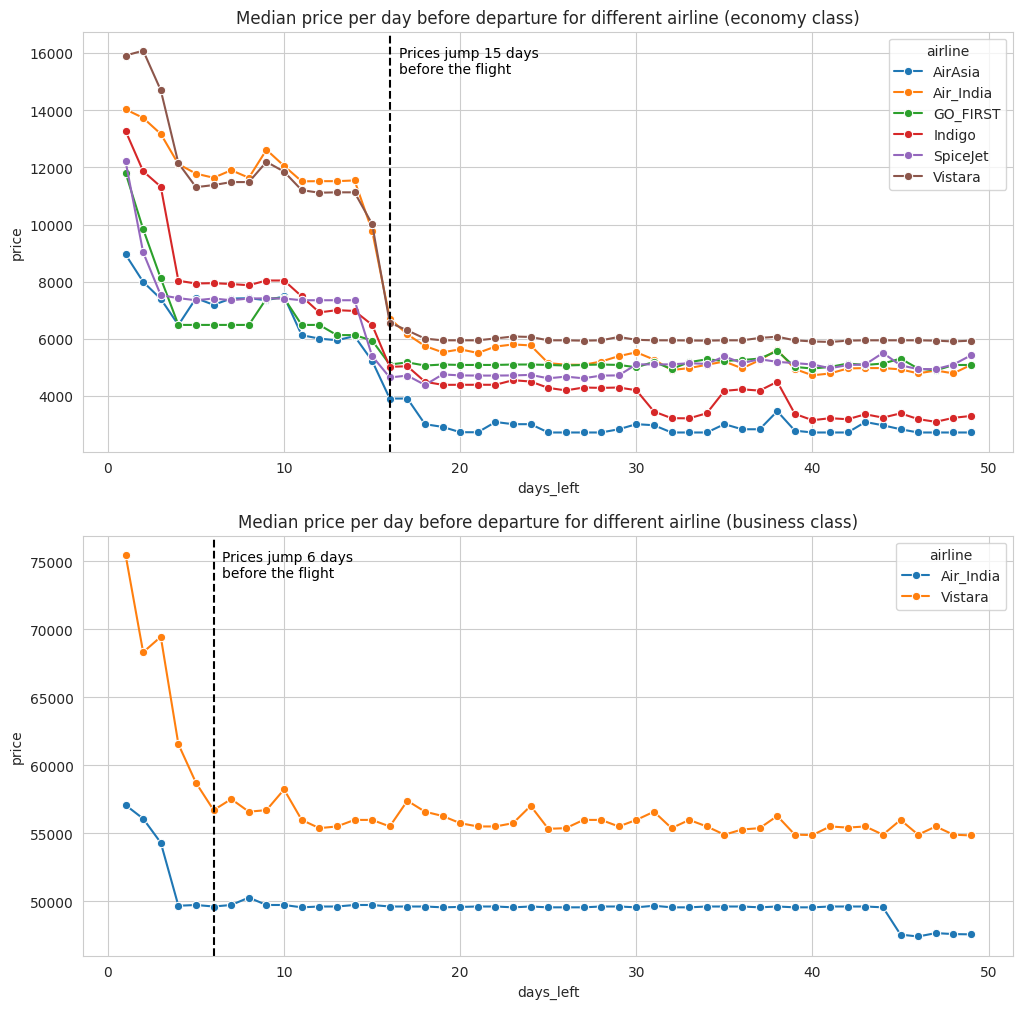

In [136]:
fig, axes = plt.subplots(2, 1, sharey=False, sharex=False, figsize=(12, 12))
sns.set_style("ticks")
sns.lineplot(
    data=price_days_left_economy,
    x="days_left",
    y="price",
    hue="airline",
    ax=axes[0],
    marker="o",
).set_title(
    "Median price per day before departure for different airline (economy class)"
)
axes[0].axvline(16, c="black", ls="--")
axes[0].text(
    16.5,
    0.90,
    f"Prices jump 15 days \nbefore the flight",
    color="black",
    transform=axes[0].get_xaxis_transform(),
)
sns.lineplot(
    data=price_days_left_business,
    x="days_left",
    y="price",
    hue="airline",
    ax=axes[1],
    marker="o",
).set_title(
    "Median price per day before departure for different airline (business class)"
)
axes[1].axvline(6, c="black", ls="--")
axes[1].text(
    6.5,
    0.90,
    f"Prices jump 6 days \nbefore the flight",
    color="black",
    transform=axes[1].get_xaxis_transform(),
)

### Predicting flight price

##### Convert categorical variables into indicator variables

In [137]:
dummies_variables = [
    "airline",
    "source_city",
    "destination_city",
    "departure_time",
    "arrival_time",
    "stops",
    "class"
]
dummies = pd.get_dummies(df[dummies_variables], dtype="int")
df = pd.concat([df, dummies], axis=1)

df = df.drop(
    [
        "flight",
        "airline",
        "source_city",
        "destination_city",
        "departure_time",
        "arrival_time",
        "stops",
        "class"
    ],
    axis=1,
)

In [138]:
df.head()

,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,stops_one,stops_two_or_more,stops_zero,class_Business,class_Economy
0,2.17,1,5953,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1
1,2.33,1,5953,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
2,2.17,1,5956,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
3,2.25,1,5955,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,2.33,1,5955,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1


In [139]:
correlation_matrix = df.corr()
correlation_matrix["price"].sort_values(key=lambda x : abs(x), ascending=False)

price                           1.000000
class_Business                  0.937860
class_Economy                  -0.937860
airline_Vistara                 0.360816
airline_Indigo                 -0.280882
duration                        0.204222
stops_one                       0.199913
airline_GO_FIRST               -0.194179
stops_zero                     -0.187277
airline_AirAsia                -0.176188
airline_SpiceJet               -0.114019
arrival_time_Late_Night        -0.093602
days_left                      -0.091949
airline_Air_India               0.070041
stops_two_or_more              -0.064248
arrival_time_Early_Morning     -0.060449
arrival_time_Evening            0.056408
destination_city_Delhi         -0.052527
departure_time_Afternoon       -0.051968
source_city_Delhi              -0.043282
departure_time_Night            0.041768
arrival_time_Afternoon         -0.040258
departure_time_Late_Night      -0.033768
arrival_time_Morning            0.030379
destination_city

In [140]:
x = df.drop(columns=["price"])
y = df["price"]


In [141]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=74)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [144]:
models = {
    "Linear Regression": LinearRegression(),
    "SVM": LinearSVR(),
    "Random Forest": RandomForestRegressor(max_features="sqrt")
}


model_results = []
for model_name, model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    model_results.append({
        "Name": model_name,
        "R2 Score": r2_score(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred)
    })
results_df = pd.DataFrame(model_results)
results_df

,Name,R2 Score,MSE
0,Linear Regression,0.911750,4.557196e+07
1,SVM,0.892305,5.561341e+07
2,Random Forest,0.983903,8.312455e+06


Text(0.5, 0, 'Actual Price')

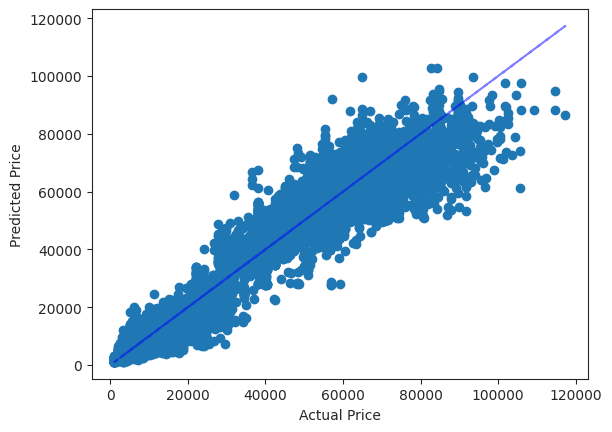

In [147]:
plt.scatter(y_test, models["Random Forest"].predict(x_test))
plt.plot(y_test, y_test, "b--", alpha=0.5, label="Actual Price")
plt.ylabel("Predicted Price")
plt.xlabel("Actual Price")